In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n_col = template.shape[1]
n_row = 500

new_matrix = np.empty([n_row, n_col])

In [4]:
new_matrix[:, :] = np.nan
sim_data = pd.DataFrame(new_matrix)
sim_data.columns = template.columns


In [5]:
import itertools

In [6]:
for column in sim_data.columns:
    if template.loc['question_type', column] in ['binary', 'likert']:
        options = template.loc['response_options', column].translate(None, "[]',")
        options = options.split()
        sim_values = np.random.choice(options, n_row)
        sim_data.loc[:, column] = sim_values
    elif template.loc['question_type', column] == 'multiple_choice':
        options = template.loc['response_options', column].translate(None, "[]',")
        options = options.split()
        n = len(options)
        for i in range(1, n):
            if i == 1:
                combinations_list = list(itertools.combinations(options, i))
            else:
                combinations_list.extend(list(itertools.combinations(options, i)))
        sim_values = np.random.choice(combinations_list, n_row)
        sim_data.loc[:, column] = sim_values
    elif template.loc['question_type', column] == 'quantity':
        quantity_mean = 35
        quantity_sd = 10
        sim_values = np.random.normal(quantity_mean, quantity_sd, n_row)
        sim_data.loc[:, column] = sim_values
    elif template.loc['question_type', column] == 'open':
        sim_data.loc[:, column] = 'there should be text here'

# Success!


In [ ]:
### DCA

In [29]:
def update_examples(path):
    sim_data = pd.read_csv(path)
    sim_data['D1_region'] = 'region_1'
    sim_data['D2_zone'] = 'zone_a'
    sim_data['D3_woreda'] = np.repeat(['woreda_1', 'woreda_2'], 200)
    sim_data['D4_camp_zone'] = np.repeat(['camp_zone_a', 'camp_zone_b'], 200)
    sim_data['D5_division'] = np.repeat(['division_1', 'division_2', 'division_3', 'division_4'], 100)
    sim_data['D6_respondent_id'] = np.arange(1, 401)
    sim_data['D8_age_of_respondent'] = ["%d years" %n for n in sim_data['D8_age_of_respondent']]
    sim_data['D9_length_of_time_in_camp'] = ["%months" %n for n in sim_data['D9_length_of_time_in_camp']]
    sim_data['A3_date'] = np.repeat(['13-10-2016', '14-10-2016', '15-10-2016', '16-10-2016'], 100)
    start_hours = np.random.choice(np.arange(8, 19), 400)
    end_hours = start_hours + 1
    minutes = np.random.choice(np.arange(10, 59), 400)
    sim_data['A3_date'] = np.repeat(['13-10-2016', '14-10-2016', '15-10-2016', '16-10-2016'], 100)
    sim_data['A4_start_time'] = [ str(start_hours[i]) + ':'  + str(minutes[i]) for i in range(400)]
    sim_data['A5_end_time'] = [ str(end_hours[i]) + ':'  + str(minutes[i]) for i in range(400)]
    sim_data.to_csv(path, index=False)

In [33]:
update_examples('ethiopia_dca_example_data.csv')
update_examples('ethiopia_plan_example_data.csv')
update_examples('ethiopia_imc_example_data.csv')
update_examples('ethiopia_sc_example_data.csv')

In [8]:
sim_data['D1_region'] = 'region_1'
sim_data['D2_zone'] = 'zone_a'
sim_data['D3_woreda'] = np.repeat(['woreda_1', 'woreda_2'], 250)
sim_data['D4_camp_zone'] = np.repeat(['camp_zone_a', 'camp_zone_b'], 250)
sim_data['D5_division'] = np.repeat(['division_1', 'division_2', 'division_3', 'division_4'], 125)
sim_data['D6_respondent_id'] = np.arange(1, 501)
sim_data['D8_age_of_respondent'] = np.round(sim_data['D8_age_of_respondent'], 0)
sim_data['D9_length_of_time_in_camp'] = ["%d years" %n for n in np.round(np.random.normal(5, 2, n_row), 0)]
sim_data['A3_date'] = np.repeat(['13-10-2016', '14-10-2016', '15-10-2016', '16-10-2016'], 125)
start_hours = np.random.choice(np.arange(8, 19), 500)
end_hours = start_hours + 1
minutes = np.random.choice(np.arange(10, 59), 500)
sim_data['A3_date'] = np.repeat(['13-10-2016', '14-10-2016', '15-10-2016', '16-10-2016'], 125)
sim_data['A4_start_time'] = [ str(start_hours[i]) + ':'  + str(minutes[i]) for i in range(500)]
sim_data['A5_end_time'] = [ str(end_hours[i]) + ':'  + str(minutes[i]) for i in range(500)]

In [118]:
sim_data.to_csv('DCA_Ethiopia_Example_Spreadsheet.csv', index=False)

In [114]:
new_matrix = np.empty([6, n_col])
new_matrix[:, :] = np.nan
response_sheet = pd.DataFrame(new_matrix)
response_sheet.columns = template.columns

In [115]:
for column in response_sheet.columns:
    if template.loc['question_type', column] in ['binary', 'likert']:
        options = template.loc['response_options', column].translate(None, "[]',")
        options = options.split()
        row = 0
        for option in options:
            response_sheet.loc[row, column] = option
            row +=1
    elif template.loc['question_type', column] == 'multiple_choice':
        options = template.loc['response_options', column].translate(None, "[]',")
        options = options.split()
        row = 0
        for i in range(1, n):
            if i == 1:
                combinations_list = list(itertools.combinations(options, i))
            else:
                combinations_list.extend(list(itertools.combinations(options, i)))
        for option in combination_list:
            response_sheet.loc[row, column] = option
            row +=1
    elif template.loc['question_type', column] == 'quantity':
        response_sheet.loc[0, column] = 'number'
    elif template.loc['question_type', column] == 'date':
        response_sheet.loc[0, column] = 'date, format: day-month-year'
    elif template.loc['question_type', column] == 'time':
        response_sheet.loc[0, column] = 'time, format: hour:minutes'
    else:
        response_sheet.loc[0, column] = 'text'

In [116]:
response_sheet.head(6)

,D1_region,D2_zone,D3_woreda,D4_camp_zone,D5_division,D6_respondent_id,D7_sex_of_respondent,D8_age_of_respondent,D9_length_of_time_in_camp,A1_enumerator_name,...,Q1_does_the_food_voucher_help_meet_your_most_important_needs,Q2_what_are_your_most_important_needs,Q3_do_you_recieve_a_top_up_at_the_right_time,Q4_are_you_able_to_give_nutritious_food_to_your_family,Q5_why_not,Q6_do_you_feel_you_have_a_say_in_the_way_the_food_voucher_support_is_provided,Q7_do_you_have_all_the_information_you_need_about_the_food_voucher_support,Q8_do_you_know_where_and_how_to_make_suggestions_or_complaints_about_the_food_voucher_support_provided_to_you,Q9_if_you_make_a_complaint_about_the_food_voucher_support_do_you_think_you_will_get_a_response,Q10_do_danchurchaid_staff_treat_you_with_respect?
0,text,text,text,text,text,text,1_female,number,number,text,...,1_not_at_all,text,1_yes,1_not_at_all,text,1_not_at_all,1_not_at_all,1_yes,1_not_at_all,1_not_at_all
1,NaN,NaN,NaN,NaN,NaN,NaN,2_male,NaN,NaN,NaN,...,2_slightly,NaN,2_no,2_slightly,NaN,2_slightly,2_slightly,2_no,2_slightly,2_slightly
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3_moderately,NaN,NaN,3_moderately,NaN,3_moderately,3_moderately,NaN,3_moderately,3_moderately
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4_nearly,NaN,NaN,4_nearly,NaN,4_nearly,4_nearly,NaN,4_nearly,4_nearly
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5_completely,NaN,NaN,5_completely,NaN,5_completely,5_completely,NaN,5_completely,5_completely
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6_dont_know,NaN,NaN,6_dont_know,NaN,6_dont_know,6_dont_know,NaN,6_dont_know,6_dont_know


In [117]:
response_sheet.to_csv('DCA_Ethiopia_Question_Names_&_Response_Alternatives.csv')

In [4]:
data = pd.read_csv('kenya_irc_example_data.csv')

data['A2_kakuma'] = 'kakuma_1'
data['A3_zone'] = np.repeat(['zone_a', 'zone_b'], 100)
data['A4_block'] = np.repeat(['block_1', 'block_2', 'block_3', 'block_4'], 50)

data.head()

,A1_name_of_enumerator,A2_kakuma,A3_zone,A4_block,D1_gender,D2_age,D3_have_you_been_visited_by_a_chp_in_the_last_4_months,D4_have_you_been_visited_by_a_chp_in_the_last_12_months,D5_what_is_your_nationality,Q1_to_what_extent_do_you_feel_safe_when_the_chp_visits_your_home,...,Q3_to_what_extent_are_the_chp_sensitive_of_your_culture_and_tradition,Q4_to_what_extent_do_you_trust_the_chp_with_your_confidential_information,Q5_to_what_extent_do_you_trust_the_health_messages_the_chp_shares_with_you,Q6_to_what_extent_do_you_have_the_information_you_need_to_make_health_choices_for_yourself_and_your_family,Q7_to_what_extent_are_the_chp_services_in_this_camp_offered_fairly_without_discrimination,Q7a_which_of_the_follow_groups_are_excluded,Q8_to_what_extent_do_you_feel_you_have_a_say_in_how_the_chp_services_in_this_camp_are_offered,Q9_do_you_know_how_to_make_a_complaint_about_the_chp,Q9a_which_mechanisms_do_you_feel_most_comfortable_using,Q10_how_important_is_the_chp_service_in_meeting_your_health_needs
0,there should be text here,kakuma_1,zone_a,block_1,1_female,2_26-49,2_no,2_no,5_burundi,5_completely,...,6_dont_know,5_completely,4_nearly,5_completely,2_slightly,"1_elderly, 2_plwds, 3_minority_ethnic_group, 4...",5_completely,1_yes,3_irc_staff,1_not_at_all
1,there should be text here,kakuma_1,zone_a,block_1,1_female,2_26-49,2_no,1_yes,2_rwanda,1_not_at_all,...,3_moderately,2_slightly,3_moderately,1_not_at_all,1_not_at_all,"1_elderly, 4_women",3_moderately,2_no,"1_community_leaders, 4_suggestion_boxes, 5_other",3_moderately
2,there should be text here,kakuma_1,zone_a,block_1,1_female,3_50+,1_yes,1_yes,8_uganda,2_slightly,...,1_not_at_all,3_moderately,6_dont_know,1_not_at_all,5_completely,"1_elderly, 4_women",1_not_at_all,2_no,"1_community_leaders, 3_irc_staff, 5_other",1_not_at_all
3,there should be text here,kakuma_1,zone_a,block_1,2_male,3_50+,1_yes,1_yes,9_other,6_dont_know,...,1_not_at_all,2_slightly,1_not_at_all,2_slightly,2_slightly,"1_elderly, 3_minority_ethnic_group, 5_children",4_nearly,1_yes,"2_help_desk., 3_irc_staff",3_moderately
4,there should be text here,kakuma_1,zone_a,block_1,2_male,2_26-49,2_no,1_yes,2_rwanda,3_moderately,...,2_slightly,2_slightly,3_moderately,2_slightly,3_moderately,"1_elderly, 3_minority_ethnic_group, 4_women, 5...",3_moderately,2_no,"1_community_leaders, 3_irc_staff, 4_suggestion...",3_moderately


In [6]:
data.to_csv('kenya_irc_example_data.csv', index=False)

In [60]:
frequency_columns = template.transpose().loc[(template.transpose()['question_type'] == 'likert') |
                         (template.transpose()['question_type'] == 'binary') &
                         (template.transpose()['question_section'] == 'main_questions'), :].index
main_freq_dict = {}
for column in frequency_columns:
    table = sim_data.loc[:, column].value_counts()
    table = pd.DataFrame(table).reset_index()
    table.columns = column, 'frequency'
    table = table.sort(columns=column).reset_index(drop=True)
    main_freq_dict[column] = table


In [61]:
excel_path = pd.ExcelWriter('DCA_Ethiopia_Frequency_Tables.xlsx')
for column in frequency_columns:
    main_freq_dict[column].to_excel(excel_path, sheet_name=column.split('_')[0], index=False)

In [52]:
for column in frequency_columns:
    print column.split('_')[0]

Q1
Q3
Q4
Q6
Q7
Q8
Q9
Q10


In [66]:
question = template.columns[10]
any([word in set(question.split('_')) for word in ['region', 'zone', 'woreda', 'camp_zone', 'division']])

False

In [17]:
question = data.columns[10]
words = question.split('_')
words[0] = words[0]+'-%d' %1
'_'.join(words)

'Q2-1_to_what_extent_does_the_chp_treat_you_with_respect_and_dignity'

## Lebanon

In [38]:
data = pd.read_csv('lebanon_kayany_example_data.csv')
data.head()

,A1_name_of_interviewer,A2_id_number_of_interviewer,A3_questionnaire_serial_number,A4_mohafaza,A5_district,A6_town,A7_exact_location,A8_date,A9_interviewee,A10_start_time,...,Q4a-3_please_explain_your_answer_list_reasons,Q4a-4_please_explain_your_answer_list_reasons,Q4a-5_please_explain_your_answer_list_reasons,Q5_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_centre,Q6_do_you_know_where_and_how_to_make_suggestions_or_complain_about_the_activities_and_the_coaches,Q7_if_you_are_to_make_a_complaint_do_you_think_you_will_get_a_response,Q8_do_the_coaches_treat_you_with_respect_and_dignity,D1_age,D2_location_of_birth,D3_time_spent_in_the_bar_elias_community
0,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,there should be text here,5_completely,1_yes,4_nearly,5_completely,16,there should be text here,11
1,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,there should be text here,5_completely,1_yes,1_not_at_all,3_moderately,17,there should be text here,17
2,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,there should be text here,3_moderately,2_no,1_not_at_all,4_nearly,17,there should be text here,14
3,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,there should be text here,7_dont_want_to_answer,2_no,7_dont_want_to_answer,5_completely,17,there should be text here,18
4,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,there should be text here,1_not_at_all,2_no,4_nearly,7_dont_want_to_answer,18,there should be text here,11


In [39]:
data['A2_id_number_of_interviewer'] = np.repeat(np.arange(1,5), 10)
data['A3_questionnaire_serial_number'] = np.random.random_integers(1000, 9999, 40)
data['A4_mohafaza'] = 'Beqaa'
data['A5_district'] = 'Zahleh'
data['A6_town'] = 'Bar Elias'
data['A8_date'] = np.repeat(['20-10-2016', '21-10-2016'], 20)
start_hours = np.random.choice(np.arange(8, 19), 40)
end_hours = start_hours + 1
minutes = np.random.choice(np.arange(10, 59), 40)
#data['A10_start_time'] = [ str(start_hours[i]) + ':'  + str(minutes[i]) for i in range(40)]
#data['A11_end_time'] = [ str(end_hours[i]) + ':'  + str(minutes[i]) for i in range(40)]
data['A_12_interview_status'] = '1_completed'
#data['D1_age'] = ["%d years" %n for n in data['D1_age']]
data['D3_time_spent_in_the_bar_elias_community'] = ["%d months" %n for n in np.random.normal(15, 5, 40)]

In [40]:
data.to_csv('lebanon_kayany_example_data.csv', index=False)

In [41]:
data = pd.read_csv('lebanon_sc_example_data.csv')
data.head()

,A1_name_of_interviewer,A2_id_number_of_interviewer,A3_questionnaire_serial_number,A4_mohafaza,A5_district,A6_town,A7_exact_location,A8_date,A9_interviewee,A10_start_time,...,Q3a-4_why_do_you_feel_unsafe_in_this_camp,Q3a-5_why_do_you_feel_unsafe_in_this_camp,Q4_are_you_aware_of_the_different_services_available_to_you_in_this_camp,Q5_did_you_receive_shelter_support_and_camp_improvements_from_save_the_children_when_you_needed_it,Q6_does_the_save_the_children_shelter_program_cause_any_tensions_between_the_camp_and_local_communities,Q6b_please_explain_how/why_it_creates_tensions_in_the_camp,Q7_do_you_feel_you_have_a_say_in_the_way_the_save_the_children_shelter_and_camp_services_are_provided,Q8_do_you_know_how_to_make_suggestions_or_complaints_about_the_quality_of_your_shelter_and_the_rest_of_the_camp_to_save_the_children,Q9_if_you_are_to_make_a_complaint_to_save_the_children_are_you_sure_you_will_get_a_response,Q10_overall_do_the_save_the_children_shelter_staff_treat_you_with_respect_and_dignity
0,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,7_dont_want_to_answer,2_no,3_moderately,there should be text here,4_nearly,2_no,7_dont_want_to_answer,2_slightly
1,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,6_dont_know,2_no,5_not_at_all,there should be text here,1_not_at_all,2_no,6_dont_know,1_not_at_all
2,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,1_not_at_all,2_no,7_dont_want_to_answer,there should be text here,5_completely,2_no,3_moderately,4_nearly
3,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,6_dont_know,2_no,1_completely,there should be text here,7_dont_want_to_answer,1_yes,2_slightly,2_slightly
4,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,there should be text here,NaN,there should be text here,NaN,...,there should be text here,there should be text here,7_dont_want_to_answer,1_yes,5_not_at_all,there should be text here,5_completely,1_yes,2_slightly,3_moderately


In [42]:
data.columns

Index([u'A1_name_of_interviewer', u'A2_id_number_of_interviewer',
       u'A3_questionnaire_serial_number', u'A4_mohafaza', u'A5_district',
       u'A6_town', u'A7_exact_location', u'A8_date', u'A9_interviewee',
       u'A10_start_time', u'A11_end_time', u'A_12_interview_status',
       u'D1_gender', u'D2_age', u'D3_location_of_birth',
       u'D4_name_of_current_camp_of_residence',
       u'D5_length_of_time_at_the_camp',
       u'Q1-1_what_are_your_most_important_needs',
       u'Q1-2_what_are_your_most_important_needs',
       u'Q1-3_what_are_your_most_important_needs',
       u'Q1-4_what_are_your_most_important_needs',
       u'Q1-5_what_are_your_most_important_needs',
       u'Q2_how_important_is_the_save_the_children_shelter_support_in_meeting_your_most_urgent_needs',
       u'Q3_do_you_feel_safe_from_harm_in_this_camp',
       u'Q3a-1_why_do_you_feel_unsafe_in_this_camp',
       u'Q3a-2_why_do_you_feel_unsafe_in_this_camp',
       u'Q3a-3_why_do_you_feel_unsafe_in_this_camp',
  

In [43]:
data['A2_id_number_of_interviewer'] = np.repeat(np.arange(1,5), 25)
data['A3_questionnaire_serial_number'] = np.random.random_integers(1000, 9999, 100)
data['A4_mohafaza'] = 'Beqaa'
data['A5_district'] = 'Zahle'
data['A6_town'] = 'Zahle'
data['A8_date'] = np.repeat(['20-10-2016', '21-10-2016'], 50)
start_hours = np.random.choice(np.arange(8, 19), 100)
end_hours = start_hours + 1
minutes = np.random.choice(np.arange(10, 59), 100)
data['A10_start_time'] = [ str(start_hours[i]) + ':'  + str(minutes[i]) for i in range(100)]
data['A11_end_time'] = [ str(end_hours[i]) + ':'  + str(minutes[i]) for i in range(100)]
data['A_12_interview_status'] = '1_completed'
data['D2_age'] = ["%d years" %n for n in data['D2_age']]
data['D5_length_of_time_at_the_camp'] = ["%d months" %n for n in np.random.normal(15, 5, 100)]

In [44]:
data.head()

,A1_name_of_interviewer,A2_id_number_of_interviewer,A3_questionnaire_serial_number,A4_mohafaza,A5_district,A6_town,A7_exact_location,A8_date,A9_interviewee,A10_start_time,...,Q3a-4_why_do_you_feel_unsafe_in_this_camp,Q3a-5_why_do_you_feel_unsafe_in_this_camp,Q4_are_you_aware_of_the_different_services_available_to_you_in_this_camp,Q5_did_you_receive_shelter_support_and_camp_improvements_from_save_the_children_when_you_needed_it,Q6_does_the_save_the_children_shelter_program_cause_any_tensions_between_the_camp_and_local_communities,Q6b_please_explain_how/why_it_creates_tensions_in_the_camp,Q7_do_you_feel_you_have_a_say_in_the_way_the_save_the_children_shelter_and_camp_services_are_provided,Q8_do_you_know_how_to_make_suggestions_or_complaints_about_the_quality_of_your_shelter_and_the_rest_of_the_camp_to_save_the_children,Q9_if_you_are_to_make_a_complaint_to_save_the_children_are_you_sure_you_will_get_a_response,Q10_overall_do_the_save_the_children_shelter_staff_treat_you_with_respect_and_dignity
0,there should be text here,1,6613,Beqaa,Zahle,Zahle,there should be text here,20-10-2016,there should be text here,16:12,...,there should be text here,there should be text here,7_dont_want_to_answer,2_no,3_moderately,there should be text here,4_nearly,2_no,7_dont_want_to_answer,2_slightly
1,there should be text here,1,9747,Beqaa,Zahle,Zahle,there should be text here,20-10-2016,there should be text here,14:13,...,there should be text here,there should be text here,6_dont_know,2_no,5_not_at_all,there should be text here,1_not_at_all,2_no,6_dont_know,1_not_at_all
2,there should be text here,1,7359,Beqaa,Zahle,Zahle,there should be text here,20-10-2016,there should be text here,12:24,...,there should be text here,there should be text here,1_not_at_all,2_no,7_dont_want_to_answer,there should be text here,5_completely,2_no,3_moderately,4_nearly
3,there should be text here,1,5512,Beqaa,Zahle,Zahle,there should be text here,20-10-2016,there should be text here,9:17,...,there should be text here,there should be text here,6_dont_know,2_no,1_completely,there should be text here,7_dont_want_to_answer,1_yes,2_slightly,2_slightly
4,there should be text here,1,5919,Beqaa,Zahle,Zahle,there should be text here,20-10-2016,there should be text here,13:49,...,there should be text here,there should be text here,7_dont_want_to_answer,1_yes,5_not_at_all,there should be text here,5_completely,1_yes,2_slightly,3_moderately


In [45]:
data.to_csv('lebanon_sc_example_data.csv', index=False)

In [58]:
path = 'mali_sc_example_data.csv'
data = pd.read_csv(path)
data['A1_coordonnees_gps'] = 'coordonnees'
data['A2_date_de_lenquete'] = np.repeat(['20-10-2016', '21-10-2016'], 50)
for column in data.columns:
    if data[column].dtype == object:
        data.loc[data[column]==np.repeat('there should be text here', 100), column] ='il_devrait_y_avoir_du_texte_ici'
data.to_csv(path, index=False)
data.head()

,A1_coordonnees_gps,A2_date_de_lenquete,A3_code_de_lenqueteur,A4_code_du_superviseur,D1_code_de_la_region,D2_code_du_cercle,D3_code_de_la_commune,D4_village/quartier/site,D5_sexe_de_linterviewe,D6_age_de_linterviewe,...,Q1a-3_quels_sont_les_besoins_cles_de_votre_enfant,Q1a-4_quels_sont_les_besoins_cles_de_votre_enfant,Q2_ avez-vous_acces_a _lassistance_quand_vous_avez_besoin,Q3_la_formation_que_vous_aviez_recu_de_save_the_children_vous_a-t-il_permit_de_mieux_vous_occuper_de_la_nutrition_de_votre_enfant,Q4_est-ce_que_vou_ pensez_que_vos_opinions_sont_prises_en_compte_dans_les_decisions_concernant_le_projet ?,Q5_savez-vous_o�_et_comment_faire_des_suggestions_ou_des_plaintes_par_rapport_a_lassistance_de_save_the_children,Q5a_si_vous_faites_une_plainte_par_rapport_a_lappui_de_save_the_children_pensez-vous_que_vous_allez_obtenir_une_reponse,Q6_le_personnel_de_save_the_children_vous_traite_il_avec_respect_et_dignite,Q7_vous_sentez_vous_suffisamment_inform�_sur_les_services_offerts_par_save_the_children,observations_generales_de_lenqueteur
0,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,23,...,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_non,5_extremement,3_moyennement,1_oui,5_tout_a_fait,6_je_ne_sais_pas,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici
1,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,30,...,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_non,6_je_ne_se_pas,4_la_plupart_du_temps_oui,1_oui,5_tout_a_fait,5_tout_a_fait,4_la_plupart_du_temps_oui,il_devrait_y_avoir_du_texte_ici
2,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,21,...,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_oui,5_extremement,4_la_plupart_du_temps_oui,1_oui,1_pas_du_tout,4_la_plupart_du_temps_oui,2_pas_vraiment,il_devrait_y_avoir_du_texte_ici
3,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,27,...,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_oui,2_pas_vraiment,6_je_ne_sais_pas,1_oui,3_moyennement,5_tout_a_fait,5_tout_a_fait,il_devrait_y_avoir_du_texte_ici
4,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,28,...,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_oui,2_pas_vraiment,6_je_ne_sais_pas,2_non,3_moyennement,6_je_ne_sais_pas,3_moyennement,il_devrait_y_avoir_du_texte_ici


In [59]:
path = 'mali_aen_example_data.csv'
data = pd.read_csv(path)
data['A1_coordonnees_gps'] = 'coordonnees'
data['A2_date_de_lenquete'] = np.repeat(['20-10-2016', '21-10-2016'], 50)
for column in data.columns:
    if data[column].dtype == object:
        data.loc[data[column]==np.repeat('there should be text here', 100), column] ='il_devrait_y_avoir_du_texte_ici'
data.to_csv(path, index=False)
data.head()

,A1_coordonnees_gps,A2_date_de_lenquete,A3_code_de_lenqueteur,A4_code_du_superviseur,D1_code_de_la_region,D2_code_du_cercle,D3_code_de_la_commune,D4_village/quartier/site,D5_sexe_de_linterviewe,D6_age_de_linterviewe,...,Q4a-4_si_oui_quel_type_de_tension_la_distribution_des_kits_a_cause,Q5_es_ce_que_tout_le_monde_qui_en_a_besoin_a_acces_aux_infrastructures_et_kits_dhygiene,Q5a-1_qui_na_pas_acces_qui_devrait,Q5a-2_qui_na_pas_acces_qui_devrait,Q5a-3_qui_na_pas_acces_qui_devrait,Q6_votre_opinion_est-elle_prise_en_compte_dans_les_decisions_concernant_le_projet,Q7_savez-vous_ou_et_comment_faire_des_suggestions_ou_des_plaintes_par_rapport_a_lassistance_de_laen_et_son_partenaire,Q8_si_vous_faites_une_plainte_par_rapport_aux_activites_de_laen_et_de_son_partenaire_pensez-vous_que_vous_allez_obtenir_une_reponse,Q9_est-ce_que_le_personnel_de_laen_et_son_partenaire_vous_traitent_avec_respect_et_dignite,observations_generales_de_lenqueteur
0,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,24,...,il_devrait_y_avoir_du_texte_ici,5_extremement,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,4_la_plupart_du_temps_oui,2_non,5_tout_a_fait,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici
1,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,30,...,il_devrait_y_avoir_du_texte_ici,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,4_la_plupart_du_temps_oui,1_oui,5_tout_a_fait,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici
2,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,25,...,il_devrait_y_avoir_du_texte_ici,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_pas_du_tout,1_oui,5_tout_a_fait,3_moyennement,il_devrait_y_avoir_du_texte_ici
3,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,29,...,il_devrait_y_avoir_du_texte_ici,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,6_je_ne_sais_pas,1_oui,6_je_ne_sais_pas,6_je_ne_sais_pas,il_devrait_y_avoir_du_texte_ici
4,coordonnees,20-10-2016,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,27,...,il_devrait_y_avoir_du_texte_ici,3_moyennement,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,6_je_ne_sais_pas,1_oui,5_tout_a_fait,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici


In [16]:
path = 'mali_care_example_data.csv'
data = pd.read_csv(path)
data['A1_coordonnees_gps'] = 'coordonnees'
data['A2_date_de_lenquete'] = np.repeat(['20-10-2016', '21-10-2016'], 50)
for column in data.columns:
    if data[column].dtype == object:
        data.loc[data[column]==np.repeat('there should be text here', 100), column] ='il_devrait_y_avoir_du_texte_ici'
data.loc[:, 'D7'] = np.repeat(['1_beneficiaires_de_distribution_directe', '2_beneficiaires_de_coupon'], [60, 40])
data.to_csv(path, index=False)
data.iloc[0:10, 5:15]

,D2_code_du_cercle,D3_code_de_la_commune,D4_village/quartier/site,D5_sexe_de_linterviewe,D6_age_de_linterviewe,D7,Q1_est-ce_que_lassistance_alimentaire_fournie_par_care_repond_a_vos_besoins_cles,Q1a-1_quels_sont_vos_besoins_cles,Q1a-2_quels_sont_vos_besoins_cles,Q1a-3_quels_sont_vos_besoins_cles
0,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,21,1_beneficiaires_de_distribution_directe,6_je_ne_sais_pas,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
1,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,25,1_beneficiaires_de_distribution_directe,3_moyennement,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
2,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,27,1_beneficiaires_de_distribution_directe,6_je_ne_sais_pas,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
3,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,26,1_beneficiaires_de_distribution_directe,4_la_plupart_du_temps_oui,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
4,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,16,1_beneficiaires_de_distribution_directe,4_la_plupart_du_temps_oui,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
5,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,24,1_beneficiaires_de_distribution_directe,2_pas_vraiment,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
6,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,23,1_beneficiaires_de_distribution_directe,5_tout_a_fait,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
7,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,30,1_beneficiaires_de_distribution_directe,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
8,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,27,1_beneficiaires_de_distribution_directe,4_la_plupart_du_temps_oui,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
9,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,20,1_beneficiaires_de_distribution_directe,5_tout_a_fait,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici


In [83]:
path = 'mali_mercy_example_data.csv'
data = pd.read_csv(path)
data['A1_coordonnees_gps'] = 'coordonnees'
data['A2_date_de_lenquete'] = np.repeat(['20-10-2016', '21-10-2016'], 50)
for column in data.columns:
    if data[column].dtype == object:
        data.loc[data[column]==np.repeat('there should be text here', 100), column] ='il_devrait_y_avoir_du_texte_ici'
data.loc[:, 'D7'] = np.repeat(['1_beneficiaires_du_programm_de_relance_economique',
                              '2_beneficiaires_du_programme_de_fourrage_animaux', 
                              '3_beneficiaires_du_programme_agriculture'], (34, 33, 33))
data.to_csv(path, index=False)
data.iloc[0:10, 5:15]

,D2_code_du_cercle,D3_code_de_la_commune,D4_village/quartier/site,D5_sexe_de_linterviewe,D6_age_de_linterviewe,D7,Q1_est_ce_que_lappui_de_mercy_corps_repond-ils_a_vos_besoins_cl�s�,Q1a-1_quels_sont_les_besoins_cles ?,Q1a-2_quels_sont_les_besoins_cles ?,Q1a-3_quels_sont_les_besoins_cles ?
0,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,30,1_beneficiaires_du_programm_de_relance_economique,4_la_plupart_du_temps_oui,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
1,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,28,1_beneficiaires_du_programm_de_relance_economique,3_moyennement,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
2,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,22,1_beneficiaires_du_programm_de_relance_economique,1_pas_du_tout,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
3,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,22,1_beneficiaires_du_programm_de_relance_economique,2_pas_vraiment,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
4,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,25,1_beneficiaires_du_programm_de_relance_economique,3_moyennement,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
5,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,24,1_beneficiaires_du_programm_de_relance_economique,4_la_plupart_du_temps_oui,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
6,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,30,1_beneficiaires_du_programm_de_relance_economique,5_tout_a_fait,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
7,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,2_feminin,29,1_beneficiaires_du_programm_de_relance_economique,6_je_ne_sais_pas,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
8,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,30,1_beneficiaires_du_programm_de_relance_economique,3_moyennement,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici
9,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,1_masculin,25,1_beneficiaires_du_programm_de_relance_economique,3_moyennement,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici,il_devrait_y_avoir_du_texte_ici


# Actually preparing analysis code

## Loading data

In [2]:
data_path = '../example_data/ethiopia/ethiopia_plan_example_data.csv'
template_path = '../templates/ethiopia/ethiopia_plan_template.csv'
data = pd.read_csv(data_path)
template = pd.read_csv(template_path, index_col=0)
template = template.transpose()

## Checking that column names match

In [4]:
mismatches, mismatch_numbers = mismatch_search(data, template)

['D5_division', 'D9_length_of_time_in_camp', 'A4_start_time', 'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards ', 'Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space ']


### manually matching labels

In [5]:
matched_labels = ['D5_division_if_any', 'D9_length_of_time_in_the_camp',
                'A4_starting_time',
                'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards',
                'Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space']

### changing the column names to fit the template

In [7]:
matching_dict = gen_match_dict(mismatches, matched_labels)

### running the test again to make sure everything has worked

In [9]:
mismatches, mismatch_numbers = mismatch_search(data, template)

[]


## getting the column names for the automatic analysis

In [10]:
demographic_columns = template.loc[template['question_section'].isin(['demograpic_data', 'demographic_data']), :].index
collection_columns = template.loc[template['question_section']=='collection_info', :].index
question_columns = template.loc[template['question_section']=='main_questions', :].index

template_questions = template.loc[question_columns] 
breakdown_columns = template_questions.loc[template_questions['question_type'].isin(['binary', 'likert']), :].index
mean_columns = template_questions.loc[template_questions['question_type'].isin(['likert']), :].index

### checking that the options are correctly labelled for the likert scales and the binary questions

## generating the excel spreadsheet

### demographics

In [65]:
writer = pd.ExcelWriter('ethiopia_plan_example_output.xlsx')

In [66]:
demographic_columns

['D1_region',
 'D2_zone',
 'D3_woreda',
 'D4_camp_zone',
 'D5_division_if_any',
 'D7_sex_of_respondent',
 'D8_age_of_respondent',
 'D9_length_of_time_in_the_camp']

In [67]:
demographic_columns = [x for x in demographic_columns if x != 'D6_respondent_id']
demographic_columns

['D1_region',
 'D2_zone',
 'D3_woreda',
 'D4_camp_zone',
 'D5_division_if_any',
 'D7_sex_of_respondent',
 'D8_age_of_respondent',
 'D9_length_of_time_in_the_camp']

In [68]:
row = 0
for column in demographic_columns:
    print column
    print row
    if 'age' in column.split('_'):
        year_list = []
        for index in data.index:
            year_list.append(np.int(data.loc[index, column].split()[0]))
        data['age_quantiles'] = pd.qcut(year_list, 3)
        output = pd.DataFrame(data.loc[:, 'age_quantiles'].value_counts())
        output.columns = [column]
        print output
    else:
        output = pd.DataFrame(data.loc[:, column].value_counts())
        output.columns = [column]
    output.to_excel(writer, 'demographics', startrow=row)
    row = row + output.shape[0] + 2
    print output.shape[0]

D1_region
0
1
D2_zone
3
1
D3_woreda
6
2
D4_camp_zone
10
2
D5_division_if_any
14
4
D7_sex_of_respondent
20
2
D8_age_of_respondent
24
          D8_age_of_respondent
[6, 31]                    146
(39, 62]                   132
(31, 39]                   122
3
D9_length_of_time_in_the_camp
29
13


In [69]:
writer.save()

In [70]:
question_columns

Index([u'Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space',
       u'Q1b_what_are_you_not_satisfied_with',
       u'Q2_are_you_able_to_attend_the_activities_that_you_want_to',
       u'Q2b_why_not',
       u'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards',
       u'Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space',
       u'Q5_do_you_feel_safe_from_harm_in_this_camp',
       u'Q5b_why_do_you_feel_unsafe_in_this_camp',
       u'Q6_do_you_know_who_to_talk_to_if_you_have_a_problem_with_the_activities_in_the_child_friendly_space',
       u'Q7_if_you_make_a_complaint_about_the_activities_do_you_think_you_will_get_a_response',
       u'Q8_do_plan_international_staffs_treat_you_well'],
      dtype='object')

In [71]:
data['Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards'].value_counts()

5_completely    88
2_slightly      69
4_nearly        60
1_not_at_all    59
3_moderately    56
Name: Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards, dtype: int64

In [72]:
data.loc[data['Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards']==
        '6_dont_know', 'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards'] = np.nan

In [73]:
table = gen_freq_table(data, 'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards')
table

,Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards,frequency,percent,cum_frequency,cum_proportion
0,1_not_at_all,59,18.0,59,0.177711
1,2_slightly,69,21.0,128,0.385542
2,3_moderately,56,17.0,184,0.554217
3,4_nearly,60,18.0,244,0.734940
4,5_completely,88,27.0,332,1.000000


In [74]:
table = gen_freq_table(data, 'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards')
table

,Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards,frequency,percent,cum_frequency,cum_proportion
0,1_not_at_all,59,18.0,59,0.177711
1,2_slightly,69,21.0,128,0.385542
2,3_moderately,56,17.0,184,0.554217
3,4_nearly,60,18.0,244,0.734940
4,5_completely,88,27.0,332,1.000000


IOError: [Errno 2] No such file or directory: 'output/Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards.pdf'

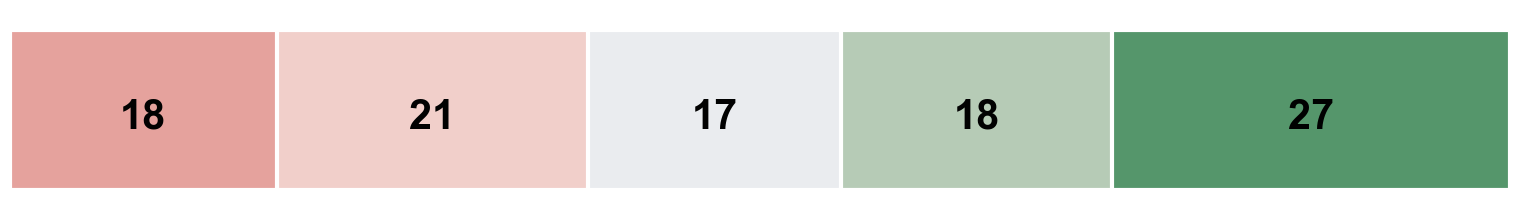

In [75]:
draw_likert_plot(gen_freq_table(data, 'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards'))

In [ ]:
def reverse_question_scoring(data, question):
    response_numbers = [np.int(answer.split('_')[0]) for answer in data[question]]
    response_numbers = np.array(response_numbers)
    response_numbers = max(response_numbers) - response_numbers + 1
    response_splits = [answer.split('_') for answer in data[question]]
    updated_responses = []
    for x in range(len(response_splits)):
        updated_responses.append(np.str(response_numbers[x]) + '_' + response_splits[x][1])
    return updated_responses

In [76]:
data['Q2_are_you_able_to_attend_the_activities_that_you_want_to'] = reverse_question_scoring(data, 'Q2_are_you_able_to_attend_the_activities_that_you_want_to')

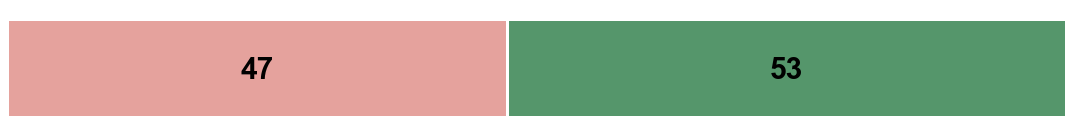

In [481]:
draw_binary_plot(gen_freq_table(data, 'Q2_are_you_able_to_attend_the_activities_that_you_want_to'))

## Code for disaggregation Tables and plots

In [36]:
demographic_columns

['D1_region',
 'D2_zone',
 'D3_woreda',
 'D4_camp_zone',
 'D5_division_if_any',
 'D7_sex_of_respondent',
 'D8_age_of_respondent',
 'D9_length_of_time_in_the_camp']

In [344]:
table = gen_disag_table(data, 'Q2_are_you_able_to_attend_the_activities_that_you_want_to', 'D7_sex_of_respondent')

In [345]:
table

,D7_sex_of_respondent,Q2_are_you_able_to_attend_the_activities_that_you_want_to,frequency,percent,cum_frequency,cum_proportion
0,1_female,1_no,84,43.979058,84,0.439791
1,1_female,2_yes,107,56.020942,191,1.000000
2,2_male,1_no,105,50.239234,105,0.502392
3,2_male,2_yes,104,49.760766,209,1.000000


In [67]:
def draw_disag_plot(table, likert=True):
    likert_colours = sns.color_palette(["#f19891", "#f8cac3", "#e9ecf0", "#b2cfb3", "#4aa168", "#d1b26f", '#ad8150'])
    binary_colours = sns.color_palette(["#f19891", "#4aa168", "#d1b26f", '#ad8150'])
    if likert == True:
        colours = likert_colours
    else:
        colours = binary_colours

    # this is a stiupid formula so that the figure gets 2 inches wider for each category, with an additional inch for
    # the whitespace between each category
    fig_height = len(table.loc[:, table.columns[0]].unique())*2
    fig, ax = plt.subplots(figsize=(15, fig_height))
    
    # preparing and plotting the basic graph
    table2 = table.pivot(index=table.columns[0], columns=table.columns[1], values='percent')
    table2.plot(kind='barh', stacked=True, color=colours, ax=ax, legend=False, width=0.6)

    # remove black lines around the figure
    sns.despine(top=True, right=True, left=True, bottom=True)
    ax.set(xticklabels=[], ylabel='', yticklabels=[])

    #create the white spaces between the squares
    rects = ax.patches
    [rect.set(edgecolor='white', linewidth=3) for rect in rects]

    # Adding the percentage labels
    for p in ax.patches:
        ax.annotate("{0:.0f}".format(p.get_width()),
                    (p.get_x() + p.get_width()/2-2, p.get_y()), xytext=(0, 30), textcoords='offset points',
                   weight='bold', size=30)
    # savefig
    question_name = table2.columns.name + '_' + table2.index.name + '_alternatives'
    for alternative in table.iloc[:, 1].unique():
        question_name = question_name + '_' + np.str(alternative)
    plt.tight_layout()
    fig.gca().set_axis_off()
    fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
    hspace = 0, wspace = 0)
    ax.margins(0,0)
    fig.gca().xaxis.set_major_locator(plt.NullLocator())
    fig.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig('output/' + table2.columns.name + '_breakdowns' + question_name+'.pdf', dpi=600, bbox_inches='tight', pad_inches=0)

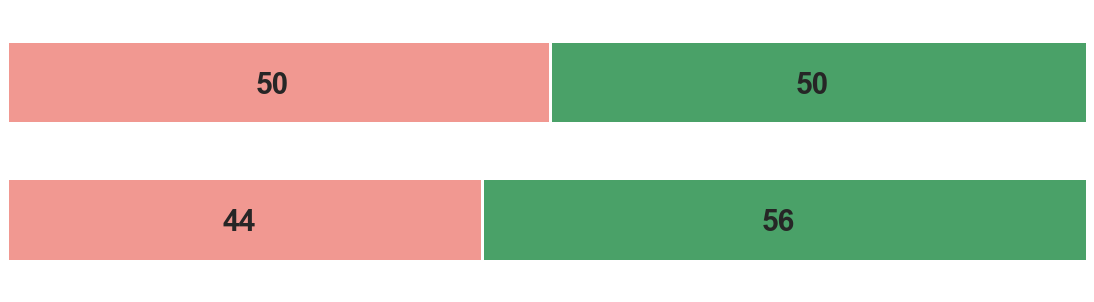

In [450]:
draw_disag_plot(gen_disag_table(data, 'Q2_are_you_able_to_attend_the_activities_that_you_want_to', 'D7_sex_of_respondent'), likert=False)

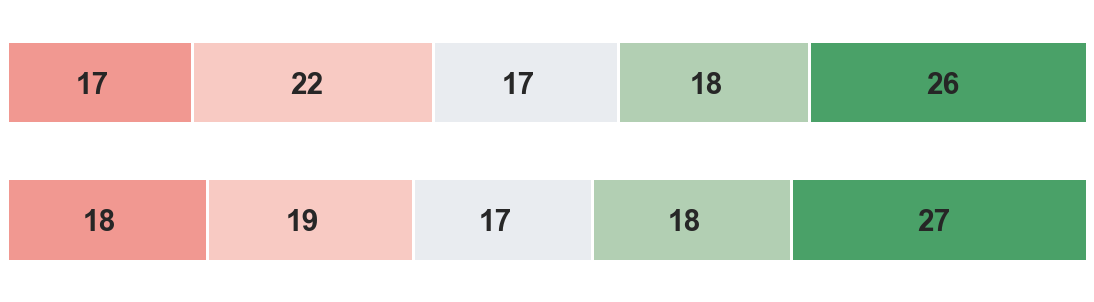

In [451]:
draw_disag_plot(gen_disag_table(data, 'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards', 'D7_sex_of_respondent'), likert=True)

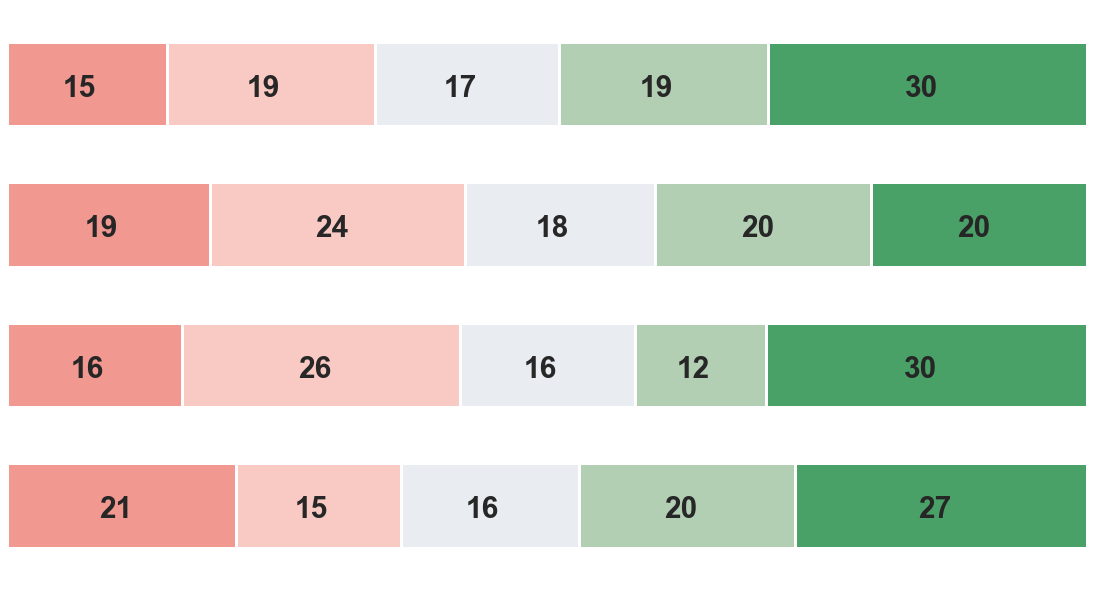

In [452]:
draw_disag_plot(gen_disag_table(data, 'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards', 'D5_division_if_any'), likert=True)

# Practice, Complete Analysis

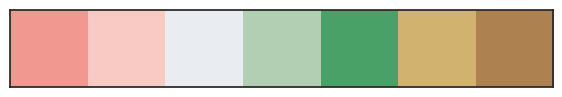

In [77]:
likert_colours = sns.color_palette(["#f19891", "#f8cac3", "#e9ecf0", "#b2cfb3", "#4aa168", "#d1b26f", '#ad8150'])
binary_colours = sns.color_palette(["#f19891", "#4aa168", "#d1b26f", '#ad8150'])
sns.palplot(likert_colours)

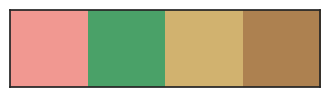

In [78]:
binary_colours = sns.color_palette(["#f19891", "#4aa168", "#d1b26f", '#ad8150'])
sns.palplot(binary_colours)

### Loading The Data

In [79]:
data_path = '../example_data/ethiopia/ethiopia_plan_example_data.csv'
template_path = '../templates/ethiopia/ethiopia_plan_template.csv'
data = pd.read_csv(data_path)
template = pd.read_csv(template_path, index_col=0)
template = template.transpose()

In [80]:
def mismatch_search(data, template):
    mismatches = []
    mismatch_numbers = []
    mismatch_number = 0
    for column in data.columns:
        if column not in template.index:
            mismatches.append(column)
            mismatch_numbers.append(mismatch_number)
        mismatch_number +=1
    print mismatches
    return mismatches, mismatch_numbers

In [81]:
def find_suggested_labels(mismatches, template):
    suggestion_list = []
    mismatch_prefixes = [mismatch.split('_')[0] for mismatch in mismatches]
    for label in template.index:
        if label.split('_')[0] in mismatch_prefixes:
            suggestion_list.append(label)
    return suggestion_list

In [82]:
def gen_match_dict(mismatches, suggestions):
    matching_dict ={}
    mismatches_no_partner = []
    for mismatch in mismatches:
        match = False
        for suggestion in suggestions:
                if mismatch.split('_')[0] == suggestion.split('_')[0]:
                    matching_dict[mismatch] = suggestion
                    match = True
        if match == False:
            mismatches_no_partner.append(mismatch)
            
    if len(mismatches) == len(matching_dict):
        return matching_dict
    else:
        return np.nan()
        print 'Matching failed, the following data columns lack suggestions:'
        print mismatches_no_partner

### Check if column names doesn't match

In [83]:
mismatches, mismatch_numbers = mismatch_search(data, template)

['D5_division', 'D9_length_of_time_in_camp', 'A4_start_time', 'Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards ', 'Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space ']


### Suggest matches for mismatched column names

In [84]:
suggested_matches = find_suggested_labels(mismatches, template)

### create a dictionary to easily change the column names

In [85]:
match_dict = gen_match_dict(mismatches, suggested_matches)

### rename the mismatched columns

In [86]:
data = data.rename(columns=match_dict)

### check that the issue has been resolved

In [87]:
mismatches, mismatch_numbers = mismatch_search(data, template)

[]


### Get the column groups

In [88]:
demographic_columns = template.loc[template['question_section'].isin(['demograpic_data', 'demographic_data']), :].index
collection_columns = template.loc[template['question_section']=='collection_info', :].index
question_columns = template.loc[template['question_section']=='main_questions', :].index

template_questions = template.loc[question_columns] 
breakdown_columns = template_questions.loc[template_questions['question_type'].isin(['binary', 'likert']), :].index
mean_columns = template_questions.loc[template_questions['question_type'].isin(['likert']), :].index

### response overviews

In [89]:
def print_response_overview(data, columns):
    for column in columns:
        print column
        print np.sort(data.loc[:, column].unique())
        print

In [90]:
print_response_overview(data, demographic_columns)

D1_region
['region_1']

D2_zone
['zone_a']

D3_woreda
['woreda_1' 'woreda_2']

D4_camp_zone
['camp_zone_a' 'camp_zone_b']

D5_division_if_any
['division_1' 'division_2' 'division_3' 'division_4']

D6_respondent_id
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194

### Removing the id variable from the summary because it doesn't carry any meaningful information

In [91]:
demographic_columns = list(demographic_columns)
demographic_columns.remove('D6_respondent_id')

In [92]:
demographic_columns

['D1_region',
 'D2_zone',
 'D3_woreda',
 'D4_camp_zone',
 'D5_division_if_any',
 'D7_sex_of_respondent',
 'D8_age_of_respondent',
 'D9_length_of_time_in_the_camp']

In [93]:
print_response_overview(data, breakdown_columns)

Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space
['1_not_at_all' '2_slightly' '3_moderately' '4_nearly' '5_completely'
 '6_dont_know']

Q2_are_you_able_to_attend_the_activities_that_you_want_to
['1_yes' '2_no']

Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards
['1_not_at_all' '2_slightly' '3_moderately' '4_nearly' '5_completely'
 '6_dont_know']

Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space
['1_not_at_all' '2_slightly' '3_moderately' '4_nearly' '5_completely'
 '6_dont_know']

Q5_do_you_feel_safe_from_harm_in_this_camp
['1_never' '2_rarely' '3_sometimes' '4_most_of_the_time' '5_always'
 '6_dont' 'know']

Q6_do_you_know_who_to_talk_to_if_you_have_a_problem_with_the_activities_in_the_child_friendly_space
['1_yes' '2_no']

Q7_if_you_make_a_complaint_about_the_activities_do_you_think_you_will_get_a_response
['1_not_at_all' '2_slightly' '3_moderately' '4

### Determine proportion of don't knows and delete them

In [94]:
def count_dont_knows(data, template, columns):
    for column in columns:
        temp = pd.DataFrame(data.loc[:, column].value_counts())
        temp = temp.reset_index()
        temp.columns = column, 'frequency'
        temp = temp.sort_values(by=column).reset_index(drop=True)
        if template.loc[column, 'question_type'] == 'likert':
            print temp.loc[5:, :]
        elif template.loc[column, 'question_type'] == 'likert':
            print temp.loc[2:, :]

In [95]:
count_dont_knows(data, template, breakdown_columns)

  Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space  \
5                                        6_dont_know                                                        

   frequency  
5         73  
  Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards  \
5                                        6_dont_know                                          

   frequency  
5         68  
  Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space  \
5                                        6_dont_know                                          

   frequency  
5         74  
  Q5_do_you_feel_safe_from_harm_in_this_camp  frequency
5                                     6_dont         57
6                                       know         51
  Q7_if_you_make_a_complaint_about_the_activities_do_you_think_you_will_get_a_response  \
5                                        6_dont_kno

### These are obviously high enough to be included in the report, but because this is an exercise I will delete them all

In [96]:
def delete_dont_knows(data, columns):
     data.loc[:, columns] = data.loc[:, columns].replace(['6_dont_know', '3_dont_know', '7_dont_want_to_answer', '4_dont_want_to_answer'], np.nan)

In [97]:
delete_dont_knows(data, breakdown_columns)

In [98]:
data.loc[:, breakdown_columns] = data.loc[:, breakdown_columns].replace(['6_dont', 'know'], np.nan)

### Reverse code the binary questions:

In [99]:
def reverse_question_scoring(data, question):
    response_numbers = [np.int(answer.split('_')[0]) for answer in data[question]]
    response_numbers = np.array(response_numbers)
    response_numbers = max(response_numbers) - response_numbers + 1
    response_splits = [answer.split('_') for answer in data[question]]
    updated_responses = []
    for x in range(len(response_splits)):
        updated_responses.append(np.str(response_numbers[x]) + '_' + response_splits[x][1])
    return updated_responses

### Reverse the scoring of the binary questions because they are currently not going from negative to positive

In [100]:
data.loc[:, 'Q2_are_you_able_to_attend_the_activities_that_you_want_to'] = reverse_question_scoring(data, 'Q2_are_you_able_to_attend_the_activities_that_you_want_to')
data.loc[:, 'Q6_do_you_know_who_to_talk_to_if_you_have_a_problem_with_the_activities_in_the_child_friendly_space'] = reverse_question_scoring(data, 'Q6_do_you_know_who_to_talk_to_if_you_have_a_problem_with_the_activities_in_the_child_friendly_space')

In [101]:
print_response_overview(data, breakdown_columns)

Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space
[nan '1_not_at_all' '2_slightly' '3_moderately' '4_nearly' '5_completely']

Q2_are_you_able_to_attend_the_activities_that_you_want_to
['1_no' '2_yes']

Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards
[nan '1_not_at_all' '2_slightly' '3_moderately' '4_nearly' '5_completely']

Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space
[nan '1_not_at_all' '2_slightly' '3_moderately' '4_nearly' '5_completely']

Q5_do_you_feel_safe_from_harm_in_this_camp
[nan '1_never' '2_rarely' '3_sometimes' '4_most_of_the_time' '5_always']

Q6_do_you_know_who_to_talk_to_if_you_have_a_problem_with_the_activities_in_the_child_friendly_space
['1_no' '2_yes']

Q7_if_you_make_a_complaint_about_the_activities_do_you_think_you_will_get_a_response
[nan '1_not_at_all' '2_slightly' '3_moderately' '4_nearly' '5_completely']

Q8_do_plan_inter

In [102]:
def bin_quantities(data, template, quantiles=3):
    for column in template.loc[template['question_type']=='quantity', :].index:
        print column
        extracted_quantities = []
        for index in data.index:
            extracted_quantities.append(np.int(data.loc[index, column].split()[0]))
        data[column+'_quantiles'] = pd.qcut(extracted_quantities, quantiles)

In [103]:
bin_quantities(data, template)

D8_age_of_respondent
D9_length_of_time_in_the_camp


In [104]:
mean_data = data.copy()
for column in mean_columns:
    print column
    number_list = []
    for answer in mean_data.loc[: , column]:
        if answer != answer:
            number_list.append(np.nan)
        else:
            number_list.append(answer.split('_')[0])
    mean_data.loc[: , column] = number_list
    mean_data.loc[: , column] = mean_data.loc[: , column].astype(float)
mean_data.loc[0:10, mean_columns]

Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space
Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards
Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space
Q5_do_you_feel_safe_from_harm_in_this_camp
Q7_if_you_make_a_complaint_about_the_activities_do_you_think_you_will_get_a_response
Q8_do_plan_international_staffs_treat_you_well


,Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space,Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards,Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space,Q5_do_you_feel_safe_from_harm_in_this_camp,Q7_if_you_make_a_complaint_about_the_activities_do_you_think_you_will_get_a_response,Q8_do_plan_international_staffs_treat_you_well
0,NaN,5.0,4.0,4.0,NaN,4.0
1,5.0,3.0,2.0,NaN,4.0,4.0
2,2.0,3.0,5.0,NaN,NaN,3.0
3,1.0,1.0,3.0,4.0,4.0,3.0
4,2.0,1.0,1.0,4.0,NaN,2.0
5,5.0,5.0,5.0,5.0,4.0,NaN
6,NaN,1.0,5.0,1.0,5.0,NaN
7,NaN,2.0,5.0,2.0,4.0,1.0
8,5.0,4.0,4.0,4.0,2.0,1.0
9,1.0,3.0,4.0,2.0,5.0,3.0


## Creating the excel spreadsheet and plotting the graphs

In [202]:
def gen_freq_table(data, question):
    table = data[question].value_counts()
    table = pd.DataFrame(table)
    table = table.reset_index()
    table.columns = [question, 'frequency']
    if question.split('_')[0] != 'quantiles':
        table = table.sort_values(by=question, ascending=True)
    table = table.reset_index(drop=True)
    table['percent'] = table['frequency']
    table['cum_frequency'] = table['frequency']
    for index in table.index:
        if index > 0:
            table.loc[index, 'cum_frequency'] = table.loc[index, 'frequency'] + table.loc[index-1, 'cum_frequency']
    table['percent'] = table['percent']/table.loc[table.shape[0]-1, 'cum_frequency']
    table['percent'] = np.round(table['percent']*100)
    table['cum_proportion'] = table['cum_frequency']/table.loc[table.shape[0]-1, 'cum_frequency']
    return table

In [203]:
def draw_likert_plot(table):
    # set up figure parameters
    sns.set(style='white', font_scale=1.5)
    fig, ax = plt.subplots(figsize=(15,2))
    likert_colours = sns.color_palette(["#f19891", "#f8cac3", "#e9ecf0", "#b2cfb3", "#4aa168", "#d1b26f", '#ad8150'])
    
    # plot the figure
    response_categories = range(table.shape[0])
    response_categories.reverse()
    for cat in response_categories:
        sns.barplot(x=table.loc[cat, 'cum_proportion'], color=likert_colours[cat])

    # remove black lines around the figure
    sns.despine(top=True, right=True, left=True, bottom=True)
    # remove the y-scale
    ax.set(xticklabels=[])
    
    #create the white spaces between the squares
    rects = ax.patches
    [rect.set(edgecolor='white', linewidth=3) for rect in rects]

    #add the percentage labels
    labels = list(table['percent'].astype(int))
    labels.reverse()
    labels = ["{0:.0f}".format(label) for label in labels]

    start_points = [rect.get_width() for rect in rects]
    start_points.pop(0)
    start_points.append(0.0)
    end_points = [rect.get_width() for rect in rects]
    differences = np.array(end_points) - np.array(start_points)
    label_positions = differences/2 + start_points

    for rect, label, label_position in zip(rects, labels, label_positions):
        height = rect.get_height()/6
        ax.text(rect.get_x() + label_position, height, label,
                weight='bold', ha='center', va='bottom', size=30, color='#000000')
    
    # savefig
    question_name = table.columns[0]
    plt.tight_layout()
    fig.gca().set_axis_off()
    fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    ax.margins(0,0)
    fig.gca().xaxis.set_major_locator(plt.NullLocator())
    fig.gca().yaxis.set_major_locator(plt.NullLocator())
    
    plt.savefig('output/' + question_name+'.pdf', dpi=600, bbox_inches='tight', pad_inches=0)

In [204]:
def draw_binary_plot(table):
    # set up figure parameters
    sns.set(style='white', font_scale=1.5)
    fig, ax = plt.subplots(figsize=(15,2))
    binary_colours = sns.color_palette(["#f19891", "#4aa168", "#d1b26f", '#ad8150'])
    
    # plot the figure
    sns.barplot(x=table.loc[1, 'cum_proportion'], color=binary_colours[1])
    sns.barplot(x=table.loc[0, 'cum_proportion'], color=binary_colours[0])
    
    # remove black lines around the figure
    sns.despine(top=True, right=True, left=True, bottom=True)
    # remove the y-scale
    ax.set(xticklabels=[])
    
    #create the white spaces between the squares
    rects = ax.patches
    [rect.set(edgecolor='white', linewidth=3) for rect in rects]

    #add the percentage labels
    labels = list(table['percent'].astype(int))
    labels.reverse()
    labels = ["{0:.0f}".format(label) for label in labels]

    start_points = [rect.get_width() for rect in rects]
    start_points.pop(0)
    start_points.append(0.0)
    end_points = [rect.get_width() for rect in rects]
    differences = np.array(end_points) - np.array(start_points)
    label_positions = differences/2 + start_points

    for rect, label, label_position in zip(rects, labels, label_positions):
        height = rect.get_height()/6
        ax.text(rect.get_x() + label_position, height, label,
                weight='bold', ha='center', va='bottom', size=30, color='#000000')
        
    # savefig
    question_name = table.columns[0]
    plt.tight_layout()
    plt.savefig('output/'+question_name+'.pdf', dpi=600)

In [205]:
import os as os
newpath = r'output' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [206]:
writer = pd.ExcelWriter('output/ethiopia_plan_example_spreadsheet.xlsx')

In [207]:
row = 0
for column in demographic_columns:
    print column
    print row
    ### Dealing with quantities
    if column in template.loc[template['question_type']=='quantity', :].index:
        output = gen_freq_table(data, column+'_quantiles')
        output = output.sort_values(by=output.columns[0], ascending=True)
        output = output.iloc[:, 0:3]
        categories = output.iloc[:, 0]
        categories = [category.translate(None, "(),[]") for category in categories]
        categories = ['-'.join(category.split()) for category in categories]
        output.iloc[:, 0] = categories
        output.rename(columns={column+'_quantiles':column}, inplace=True)
    else:
        output = gen_freq_table(data, column)
        output = output.iloc[:, 0:3]
    output.to_excel(writer, 'demographics', startrow=row)
    print output
    row = row + output.shape[0] + 2
    print output.shape[0]

D1_region
0
  D1_region  frequency  percent
0  region_1        400    100.0
1
D2_zone
3
  D2_zone  frequency  percent
0  zone_a        400    100.0
1
D3_woreda
6
  D3_woreda  frequency  percent
0  woreda_1        200     50.0
1  woreda_2        200     50.0
2
D4_camp_zone
10
  D4_camp_zone  frequency  percent
0  camp_zone_a        200     50.0
1  camp_zone_b        200     50.0
2
D5_division_if_any
14
  D5_division_if_any  frequency  percent
0         division_1        100     25.0
1         division_2        100     25.0
2         division_3        100     25.0
3         division_4        100     25.0
4
D7_sex_of_respondent
20
  D7_sex_of_respondent  frequency  percent
0             1_female        191     48.0
1               2_male        209     52.0
2
D8_age_of_respondent
24
  D8_age_of_respondent  frequency  percent
0                 6-31        146     36.0
1                31-39        122     30.0
2                39-62        132     33.0
3
D9_length_of_time_in_the_camp
29
  

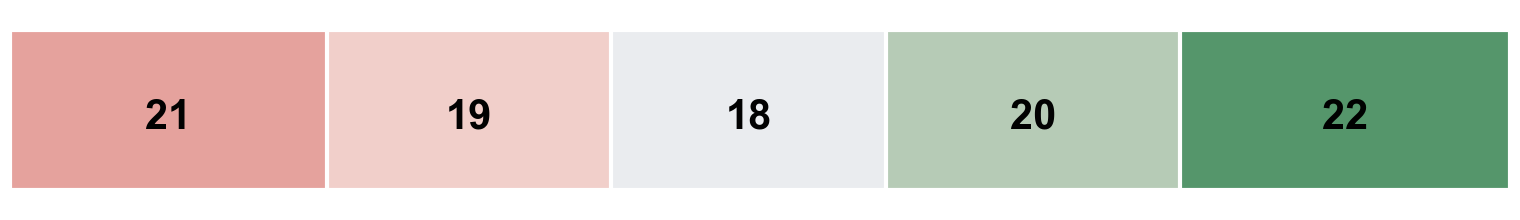

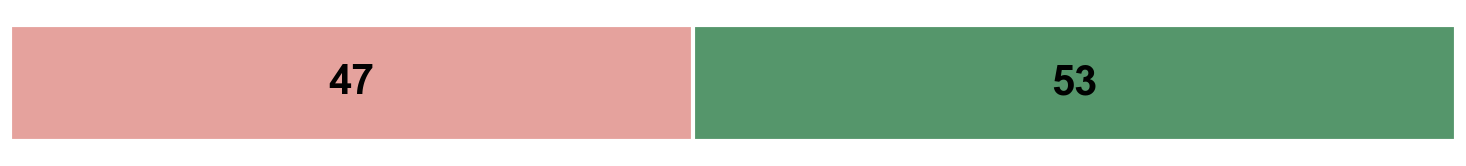

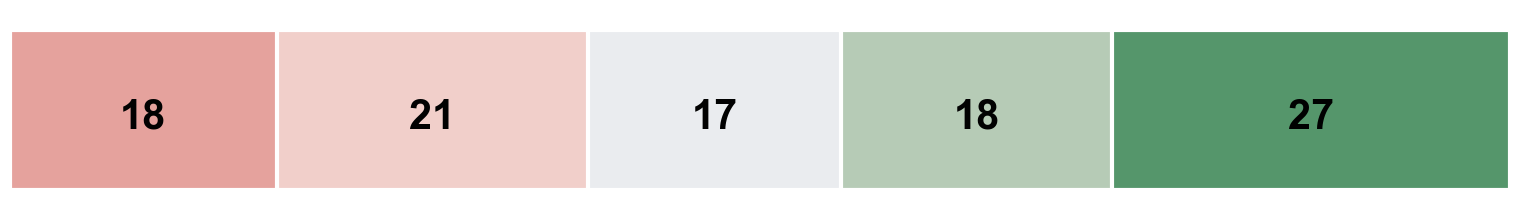

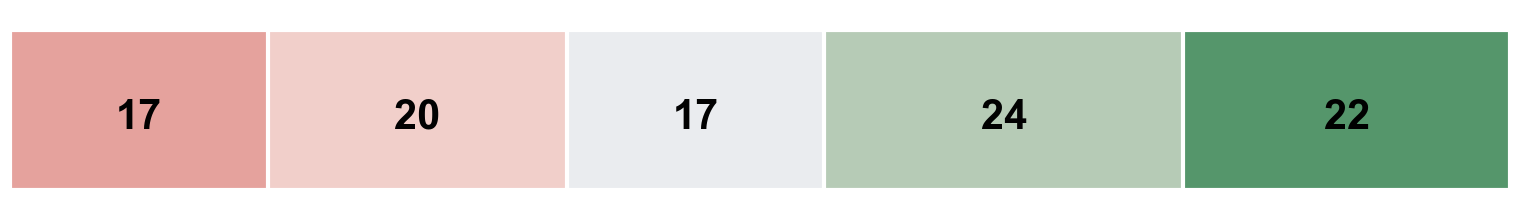

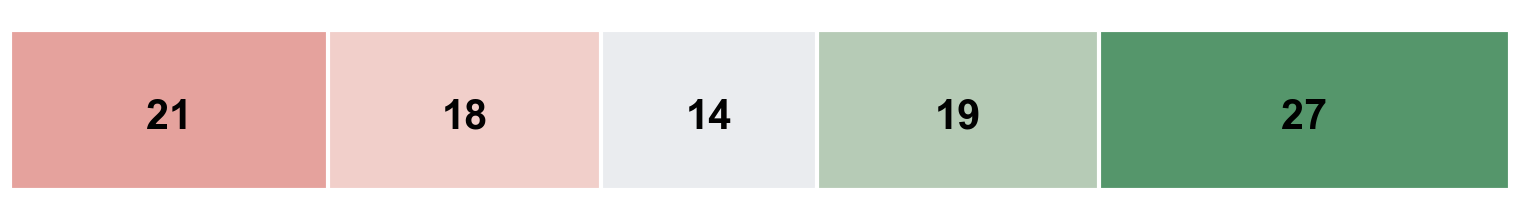

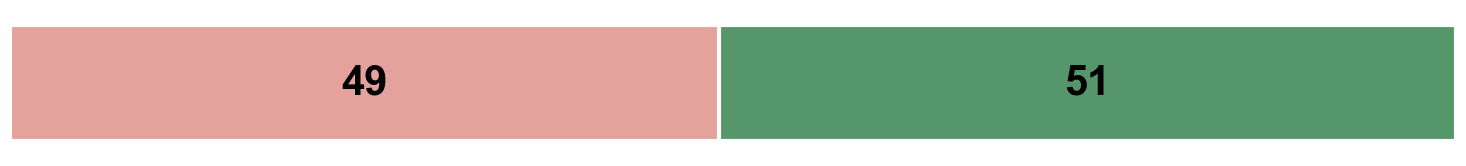

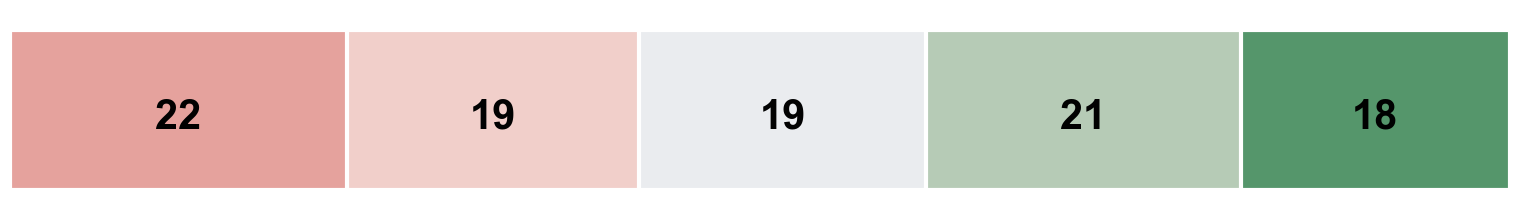

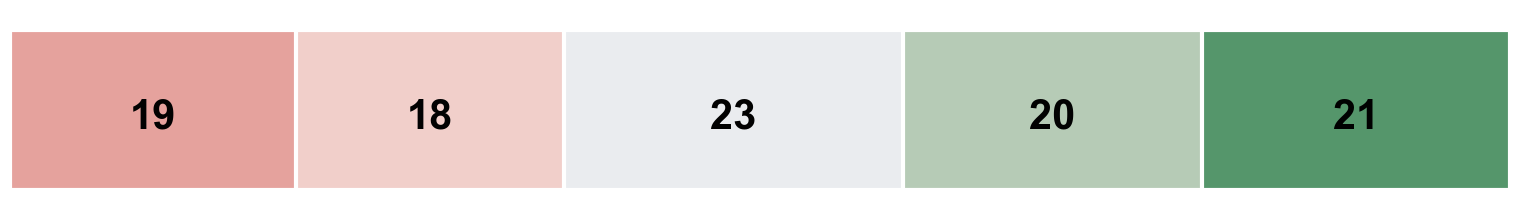

In [208]:
row = 0
written_rows = {}
def draw_basic_plot(template, column, output):
    if column in template.loc[template['question_type']=='binary', :].index:
        draw_binary_plot(output)
    elif column in template.loc[template['question_type']=='likert', :].index:
        draw_likert_plot(output)

for column in question_columns:
    ### Dealing with quantities
    if column in template.loc[template['question_type']=='quantity', :].index:
        output = gen_freq_table(data, column+'_quantiles')
        output = output.sort(output.columns[0], ascending=True)
        draw_basic_plot(template, column, output)
        output = output.iloc[:, 0:3]
        categories = output.iloc[:, 0]
        categories = [category.translate(None, "(),[]") for category in categories]
        categories = ['-'.join(category.split()) for category in categories]
        output.iloc[:, 0] = categories
    else:
        output = gen_freq_table(data, column)
        draw_basic_plot(template, column, output)
        output = output.iloc[:, 0:3]
    written_rows[column] = output.shape[0] + 2
    output.to_excel(writer, column.split('_')[0], startrow=row)
    if column in mean_columns:
        mean_data[column]

In [209]:
breakdown_variables = ['D5_division_if_any', 'D7_sex_of_respondent', 'D8_age_of_respondent',
                      'D9_length_of_time_in_the_camp']

In [210]:
def gen_disag_table(data, question, breakdown):
    table = data.groupby(breakdown)[question].value_counts()
    table = pd.DataFrame(table)
    table.columns = ['frequency']
    table = table.reset_index()
    #table.columns = breakdown, question, 'frequency',
    table = table.sort_values(by=[breakdown, question])
    table.reset_index(inplace=True, drop=True)
    table
    table['percent'] = table['frequency']
    table['cum_frequency'] = table['frequency']
    table['cum_proportion'] = np.nan

    for category in table[breakdown].unique():    
        counter = 0
        for index in table.loc[table[breakdown]==category].index:
            if counter > 0:
                table.loc[index, 'cum_frequency'] = table.loc[index, 'frequency'] + table.loc[index-1, 'cum_frequency']
            counter +=1
        table.loc[table[breakdown]==category, 'percent'] = (table.loc[table[breakdown]==category, 'percent']/
        table.loc[table.loc[table[breakdown]==category, :].index.max(), 'cum_frequency'])
        table.loc[table[breakdown]==category, 'percent'] = table.loc[table[breakdown]==category, 'percent']*100
        table.loc[table[breakdown]==category, 'cum_proportion'] = (table.loc[table[breakdown]==category, 'cum_frequency']/
        table.loc[table.loc[table[breakdown]==category, :].index.max(), 'cum_frequency'])
    return table

In [211]:
def draw_disag_plot(table, likert=True, reindex_order=np.nan):
    likert_colours = sns.color_palette(["#f19891", "#f8cac3", "#e9ecf0", "#b2cfb3", "#4aa168", "#d1b26f", '#ad8150'])
    binary_colours = sns.color_palette(["#f19891", "#4aa168", "#d1b26f", '#ad8150'])
    if likert == True:
        colours = likert_colours
    else:
        colours = binary_colours

    # this is a stiupid formula so that the figure gets 2 inches wider for each category, with an additional inch for
    # the whitespace between each category
    fig_height = len(table.loc[:, table.columns[0]].unique())*2
    fig, ax = plt.subplots(figsize=(15, fig_height))
    
    # preparing and plotting the basic graph
    table2 = table.pivot(index=table.columns[0], columns=table.columns[1], values='percent')
    if reindex_order == reindex_order:
        table2.reindex(reindex_order)
    index = list(table2.index)
    index.reverse()
    table2 = table2.reindex(index)
    table2.plot(kind='barh', stacked=True, color=colours, ax=ax, legend=False, width=0.6)

    # remove black lines around the figure
    sns.despine(top=True, right=True, left=True, bottom=True)
    alternatives = ax.get_yticklabels()
    alternatives = [alternative.get_text() for alternative in list(alternatives)]
    alternatives.reverse()
    ax.set(xticklabels=[], ylabel='', yticklabels=[])

    #create the white spaces between the squares
    rects = ax.patches
    [rect.set(edgecolor='white', linewidth=3) for rect in rects]

    # Adding the percentage labels
    for p in ax.patches:
        ax.annotate("{0:.0f}".format(p.get_width()),
                    (p.get_x() + p.get_width()/2-2, p.get_y()), xytext=(0, 30), textcoords='offset points',
                   weight='bold', size=30)
    # savefig
    question_name = table2.columns.name.split('_')[0] + '_by_' + table2.index.name.split('_')[0] + '_order'
    for alternative in alternatives:
        question_name = question_name + '_' + np.str(alternative)
    plt.tight_layout()
    fig.gca().set_axis_off()
    fig.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
    hspace = 0, wspace = 0)
    ax.margins(0,0)
    fig.gca().xaxis.set_major_locator(plt.NullLocator())
    fig.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(r'output/' + table2.index.name + '_breakdowns/' + question_name+'.pdf', dpi=600, bbox_inches='tight', pad_inches=0)
    plt.close()

IOError: [Errno 2] No such file or directory: 'output/D5_division_if_any_breakdowns/Q1_by_D5_order_division_1_division_2_division_3_division_4.pdf'

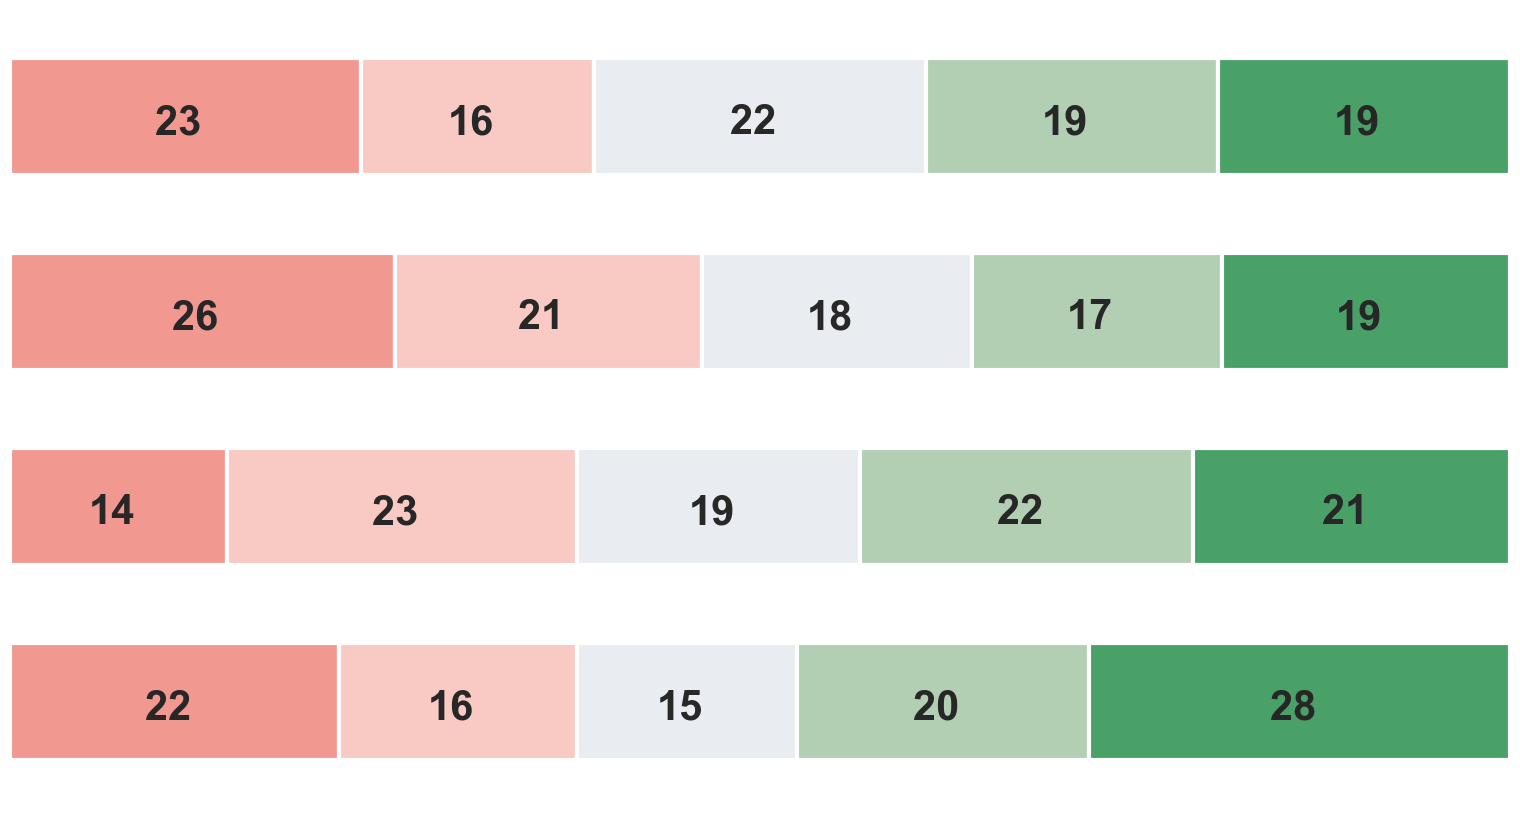

In [212]:
table = draw_disag_plot(gen_disag_table(data,
        'Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space',
                                        'D5_division_if_any'), likert=True)

In [213]:
for variable in breakdown_variables:
    quantile_table = False
    if variable in template.loc[template['question_type']=='quantity', :].index:
        variable = variable + '_quantiles'
        quantile_table = True
    newpath = r'output/' + variable + '_breakdowns'  
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    for column in breakdown_columns:
        mean_column = False
        print column
        if column in mean_columns:
            mean_column = True
            means = pd.DataFrame(mean_data.groupby(variable)[column].mean())
            means.columns = ['mean']
        if column in template.loc[template['question_type']=='likert', :].index:
            likert_question = True
        else:
            likert_question = False
        table = gen_disag_table(data, column, variable)
        if quantile_table == True:
            categories = table.iloc[:, 0].unique()
            categories = [category.translate(None, "(),[]") for category in categories]
            categories = ['-'.join(category.split()) for category in categories]
            categories
            table.iloc[:, 0] = table.iloc[:, 0].astype('str')
            table = table.replace(table.iloc[:, 0].unique(), categories)
            if mean_column == True:
                means.index = categories
        
        frequency_output = table.pivot(index=table.columns[0], columns=table.columns[1], values='frequency')
        frequency_output.columns.name = frequency_output.columns.name + '_frequency'
        if quantile_table == True:
            frequency_output = frequency_output.reindex(categories)
        
        
        percent_output = table.pivot(index=table.columns[0], columns=table.columns[1], values='percent')
        percent_output = percent_output.round().astype(int)
        percent_output.columns.name = percent_output.columns.name + '_percent'
        if quantile_table == True:
            percent_output = percent_output.reindex(categories)
        
        frequency_output.to_excel(writer, column.split('_')[0], startrow=written_rows[column])
        percent_output.to_excel(writer, column.split('_')[0], startrow=written_rows[column], startcol=10)
        if mean_column == True:
            means.to_excel(writer, column.split('_')[0], startrow=written_rows[column], startcol=20) 
        print written_rows[column]
        print frequency_output.shape[0]
        written_rows[column] = written_rows[column] + frequency_output.shape[0] + 3
        if quantile_table == True:
            draw_disag_plot(table, likert_question, reindex_order=categories)
        else:
            draw_disag_plot(table, likert_question)
    

Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space
7
4
Q2_are_you_able_to_attend_the_activities_that_you_want_to
4
4
Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards
7
4
Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_space
7
4
Q5_do_you_feel_safe_from_harm_in_this_camp
7
4
Q6_do_you_know_who_to_talk_to_if_you_have_a_problem_with_the_activities_in_the_child_friendly_space
4
4
Q7_if_you_make_a_complaint_about_the_activities_do_you_think_you_will_get_a_response
7
4
Q8_do_plan_international_staffs_treat_you_well
7
4
Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space
14
2
Q2_are_you_able_to_attend_the_activities_that_you_want_to
11
2
Q3_do_you_feel_think_that_the_skills_you_learn_here_will_help_you_in_your_life_afterwards
14
2
Q4_do_you_feel_you_have_a_say_in_what_activities_are_provided_in_the_child_friendly_

### Add the question_means and correlations

In [214]:
means = pd.DataFrame(mean_data[mean_columns].mean())
means.columns = ['mean']
means.to_excel(writer, 'question_means')
correlations = pd.DataFrame(mean_data[mean_columns].corr())
correlations.to_excel(writer, 'question_correlations')

In [215]:
writer.save()

In [142]:
mean_data['Q1_how_satisfied_are_you_with_the_activities_provided_by_plan_international_in_the_child_friendly_space'].mean()

3.0244648318042815

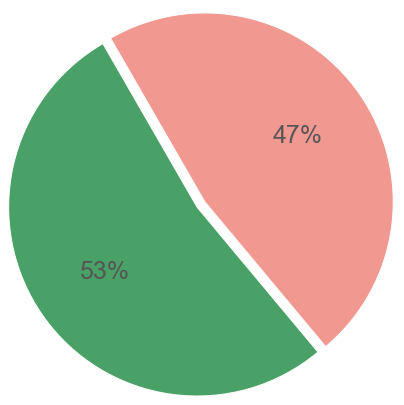

In [399]:
fig, ax = plt.subplots(figsize=(7,7))

explode = (0, 0.05,)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(example2['frequency'], explode=explode, colors=binary_colours,
        autopct='%1.f%%', shadow=False, startangle=120)
wedges = ax.patches
labels = ax.texts
[label.set(fontsize=25, color='#555555') for label in labels]
[wedge.set(edgecolor='white', linewidth=1) for wedge in wedges]
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.savefig('example_binary.svg', dpi=600)